<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2024-12-26 20:05:28--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  59.1MB/s    in 2.6s    

2024-12-26 20:05:33 (59.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [15]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [4]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [5]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [6]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [16]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [17]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [18]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)

,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


In [19]:
conn = sqlite3.connect('survey-data.sqlite')

In [20]:
import sqlite3
import re

# Custom REGEXP_SUBSTR function in Python
def regexp_substr(string, pattern, start=0):
    start = max(start, 0)  # Ensure 'start' is within bounds
    match = re.search(pattern, string[start:])
    if match:
        return match.group(0)
    return 0

# Connect to SQLite database
#conn = sqlite3.connect('your_database.db')

# Register the REGEXP_SUBSTR function with SQLite
conn.create_function('REGEXP_SUBSTR', 2, regexp_substr)

# Your SQL query to extract the minimum age
q = """
SELECT distinct
    Age as age_range,
    REGEXP_SUBSTR(CAST(Age AS TEXT), '[0-9]+') as min_age,
    REGEXP_SUBSTR(CAST(Age AS TEXT), '[0-9]+(?= years)') as max_age,
    (REGEXP_SUBSTR(CAST(Age AS TEXT), '[0-9]+')+REGEXP_SUBSTR(CAST(Age AS TEXT), '[0-9]+(?= years)'))/2.0 as avg_age,
     COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""

# AS TEXT) Execute the query
cursor=conn.cursor()
cursor.execute(q)

# Fetch the results
agect = cursor.fetchall()

# Display the results
print(agect)

# Close the connection
#conn.close()

[('18-24 years old', '18', '24', 21.0, 14098), ('25-34 years old', '25', '34', 29.5, 23911), ('35-44 years old', '35', '44', 39.5, 14942), ('45-54 years old', '45', '54', 49.5, 6249), ('55-64 years old', '55', '64', 59.5, 2575), ('65 years or older', '65', '65', 65.0, 772), ('Prefer not to say', 0, 0, 0.0, 322), ('Under 18 years old', '18', '18', 18.0, 2568)]


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [21]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [22]:
## Write your code here
sql="Select distinct CompTotal from main order by CompTotal desc"
ct=pd.read_sql_query(sql, conn)
print(ct)

          CompTotal
0     1.000000e+150
1      1.000000e+65
2      1.000000e+53
3      1.000000e+44
4      8.000000e+27
...             ...
3333   3.000000e+00
3334   2.000000e+00
3335   1.000000e+00
3336   0.000000e+00
3337            NaN

[3338 rows x 1 columns]


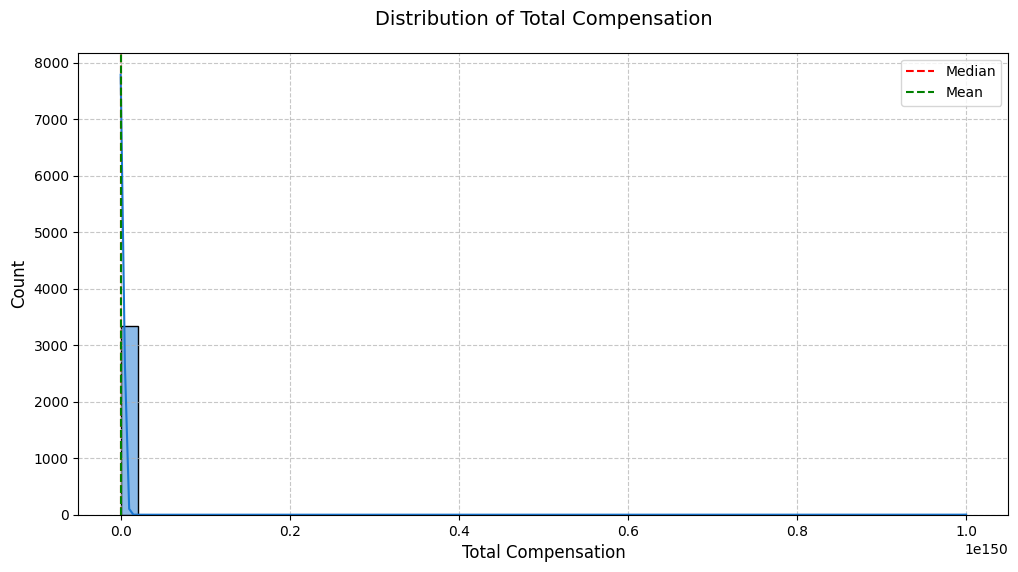

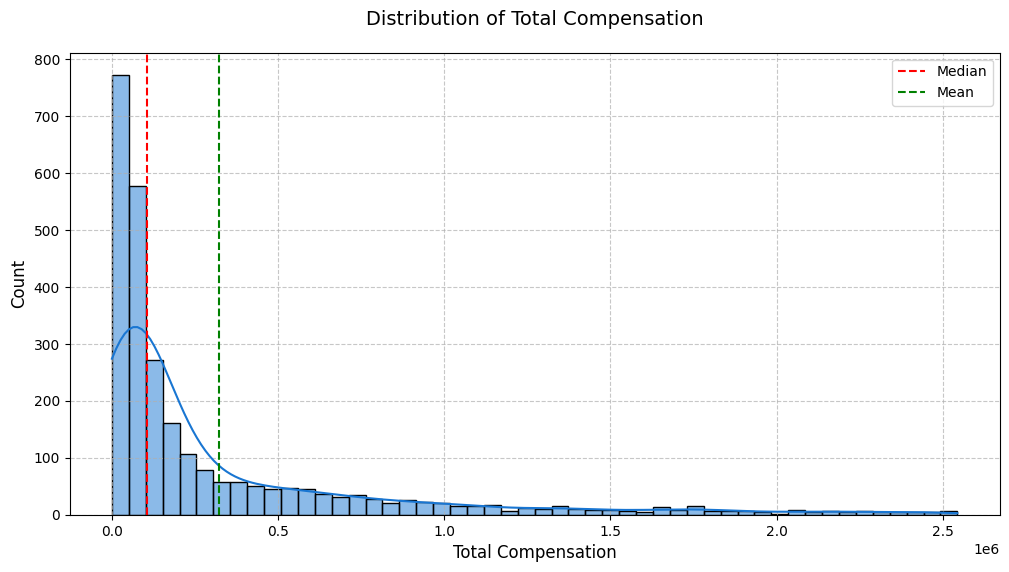

In [23]:
# Calculate IQR bounds
Q1 = ct['CompTotal'].quantile(0.25)
Q3 = ct['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
    
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
    
    # Create clean dataset
clean_df = ct[
        (ct['CompTotal'] >= lower_bound) & 
        (ct['CompTotal'] <= upper_bound)
    ].copy()
def plot_compensation_distribution(ct):
    """
    Creates comprehensive visualization of total compensation distribution
    """
    plt.figure(figsize=(12, 6))
    
    # Create histogram with KDE
    sns.histplot(
        data=ct,
        x='CompTotal',
        bins=50,
        kde=True,
        color='#1976D2'
    )
    
    # Add vertical lines for key statistics
    plt.axvline(ct['CompTotal'].median(), color='red', linestyle='--', label='Median')
    plt.axvline(ct['CompTotal'].mean(), color='green', linestyle='--', label='Mean')
    
    plt.title('Distribution of Total Compensation', pad=20, fontsize=14)
    plt.xlabel('Total Compensation', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Display statistics
    stats = {
        'Mean': ct['CompTotal'].mean(),
        'Median': ct['CompTotal'].median(),
        'Std Dev': ct['CompTotal'].std(),
        'Count': len(ct)
    }
    
    html_content = f"""
    <div style='font-family: Arial; padding: 15px; background: black; border-radius: 8px;'>
        <h3>Compensation Statistics</h3>
        <p>Mean: ${stats['Mean']:,.2f}</p>
        <p>Median: ${stats['Median']:,.2f}</p>
        <p>Standard Deviation: ${stats['Std Dev']:,.2f}</p>
        <p>Total Records: {stats['Count']:,}</p>
    </div>
    """
    
    display(HTML(html_content))
    return stats

# Execute visualization
compensation_stats = plot_compensation_distribution(ct)
compensation_stats = plot_compensation_distribution(clean_df)


**Box Plots**

Plot a box plot of Age.


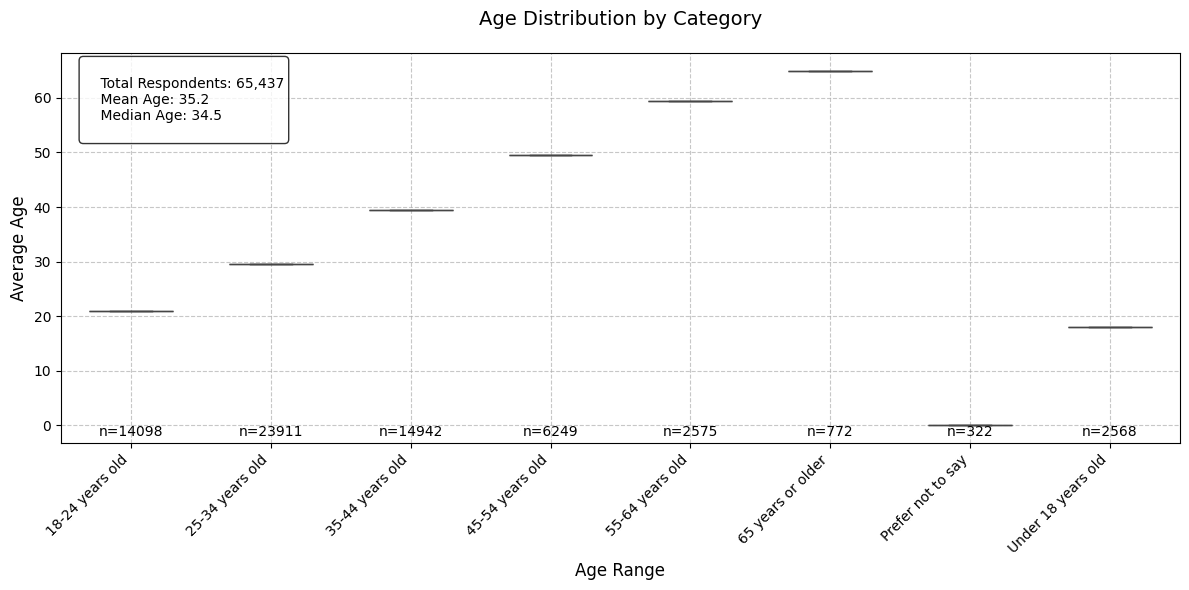

In [24]:
def create_age_distribution_plot(agect):
    """
    Creates clear box plot visualization from age category data
    """
    # Convert tuple data to DataFrame
    age_df = pd.DataFrame(agect, columns=['age_range', 'min_age', 'max_age', 'avg_age', 'count'])
    
    # Create figure
    plt.figure(figsize=(12, 6))
    
    # Create box plot
    sns.boxplot(
        data=age_df,
        x='age_range',
        y='avg_age',
        color='#1976D2',
        width=0.6
    )
    
    # Add count annotations
    for i, count in enumerate(age_df['count']):
        plt.text(i, age_df['avg_age'].min(), f'n={count}', 
                ha='center', va='top', fontsize=10)
    
    # Customize plot
    plt.title('Age Distribution by Category', pad=20, fontsize=14)
    plt.xlabel('Age Range', fontsize=12)
    plt.ylabel('Average Age', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add statistics
    stats_text = f"""
    Total Respondents: {age_df['count'].sum():,}
    Mean Age: {age_df['avg_age'].mean():.1f}
    Median Age: {age_df['avg_age'].median():.1f}
    """
    
    plt.text(0.02, 0.98, stats_text,
             transform=plt.gca().transAxes,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    return age_df

# Execute visualization
age_distribution = create_age_distribution_plot(agect)

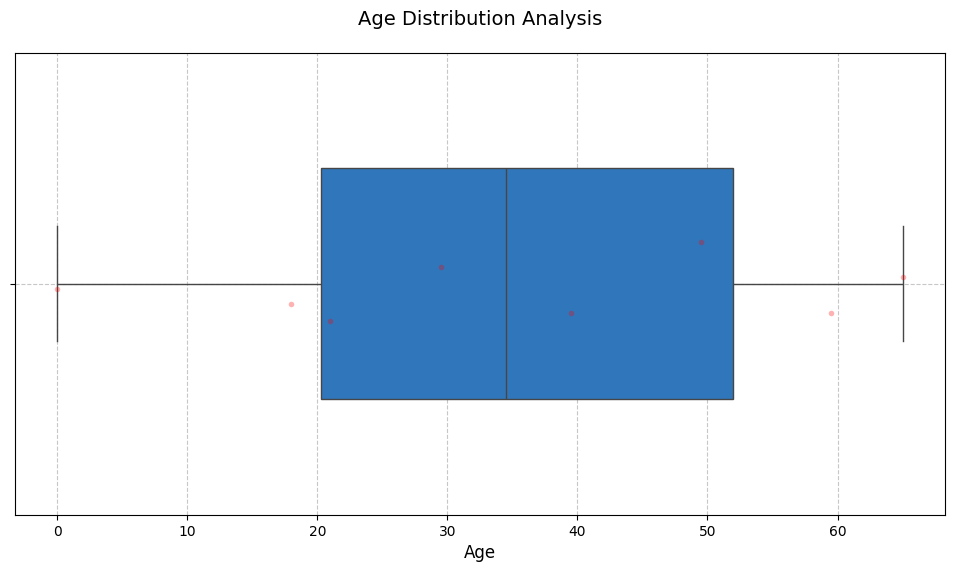

In [25]:
def create_age_boxplot(age_df):
    """
    Creates detailed box plot visualization for age distribution
    """
    df = pd.DataFrame(age_df, columns=['age_range', 'min_age', 'max_age', 'avg_age', 'count'])
    plt.figure(figsize=(12, 6))
    
    # Create box plot with individual points
    sns.boxplot(
        x=df['avg_age'],
        color='#1976D2',
        width=0.5
    )
    
    sns.stripplot(
        x=df['avg_age'],
        color='red',
        alpha=0.3,
        size=4
    )
    
    plt.title('Age Distribution Analysis', pad=20, fontsize=14)
    plt.xlabel('Age', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Calculate statistics
    stats = {
        'Median': df['avg_age'].median(),
        'Mean': df['avg_age'].mean(),
        'Q1': df['avg_age'].quantile(0.25),
        'Q3': df['avg_age'].quantile(0.75),
        'IQR': df['avg_age'].quantile(0.75) - df['avg_age'].quantile(0.25)
    }
    
    # Display statistics
    html_content = f"""
    <div style='font-family: Arial; padding: 15px; background: black; border-radius: 8px;'>
        <h3>Age Distribution Statistics</h3>
        <p>Median Age: {stats['Median']:.1f}</p>
        <p>Mean Age: {stats['Mean']:.1f}</p>
        <p>Q1: {stats['Q1']:.1f}</p>
        <p>Q3: {stats['Q3']:.1f}</p>
        <p>IQR: {stats['IQR']:.1f}</p>
    </div>
    """
    
    display(HTML(html_content))
    return stats

# Execute visualization
age_stats = create_age_boxplot(agect)


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


In [26]:
sql="Select distinct Age, WorkExp from main order by WorkExp desc"
aw=pd.read_sql_query(sql, conn)

q = """
SELECT distinct
    Age as age_range,
    REGEXP_SUBSTR(CAST(Age AS TEXT), '[0-9]+') as min_age,
    REGEXP_SUBSTR(CAST(Age AS TEXT), '[0-9]+(?= years)') as max_age,
    (REGEXP_SUBSTR(CAST(Age AS TEXT), '[0-9]+')+REGEXP_SUBSTR(CAST(Age AS TEXT), '[0-9]+(?= years)'))/2.0 as avg_age,
     COUNT(*) as count,
     WorkExp
FROM main
GROUP BY Age,WorkExp
ORDER BY Age
"""

# AS TEXT) Execute the query
cursor=conn.cursor()
cursor.execute(q)

# Fetch the results
aw = cursor.fetchall()
print(aw)

[('18-24 years old', '18', '24', 21.0, 9807, None), ('18-24 years old', '18', '24', 21.0, 148, 0.0), ('18-24 years old', '18', '24', 21.0, 1042, 1.0), ('18-24 years old', '18', '24', 21.0, 1107, 2.0), ('18-24 years old', '18', '24', 21.0, 876, 3.0), ('18-24 years old', '18', '24', 21.0, 474, 4.0), ('18-24 years old', '18', '24', 21.0, 324, 5.0), ('18-24 years old', '18', '24', 21.0, 134, 6.0), ('18-24 years old', '18', '24', 21.0, 75, 7.0), ('18-24 years old', '18', '24', 21.0, 41, 8.0), ('18-24 years old', '18', '24', 21.0, 21, 9.0), ('18-24 years old', '18', '24', 21.0, 23, 10.0), ('18-24 years old', '18', '24', 21.0, 6, 11.0), ('18-24 years old', '18', '24', 21.0, 4, 12.0), ('18-24 years old', '18', '24', 21.0, 1, 13.0), ('18-24 years old', '18', '24', 21.0, 3, 15.0), ('18-24 years old', '18', '24', 21.0, 1, 17.0), ('18-24 years old', '18', '24', 21.0, 1, 18.0), ('18-24 years old', '18', '24', 21.0, 1, 19.0), ('18-24 years old', '18', '24', 21.0, 1, 20.0), ('18-24 years old', '18', 

      Age  WorkExp
0    21.0      NaN
1    21.0      0.0
2    21.0      1.0
3    21.0      2.0
4    21.0      3.0
..    ...      ...
249  18.0      6.0
250  18.0      8.0
251  18.0      9.0
252  18.0     31.0
253  18.0     50.0

[254 rows x 2 columns]


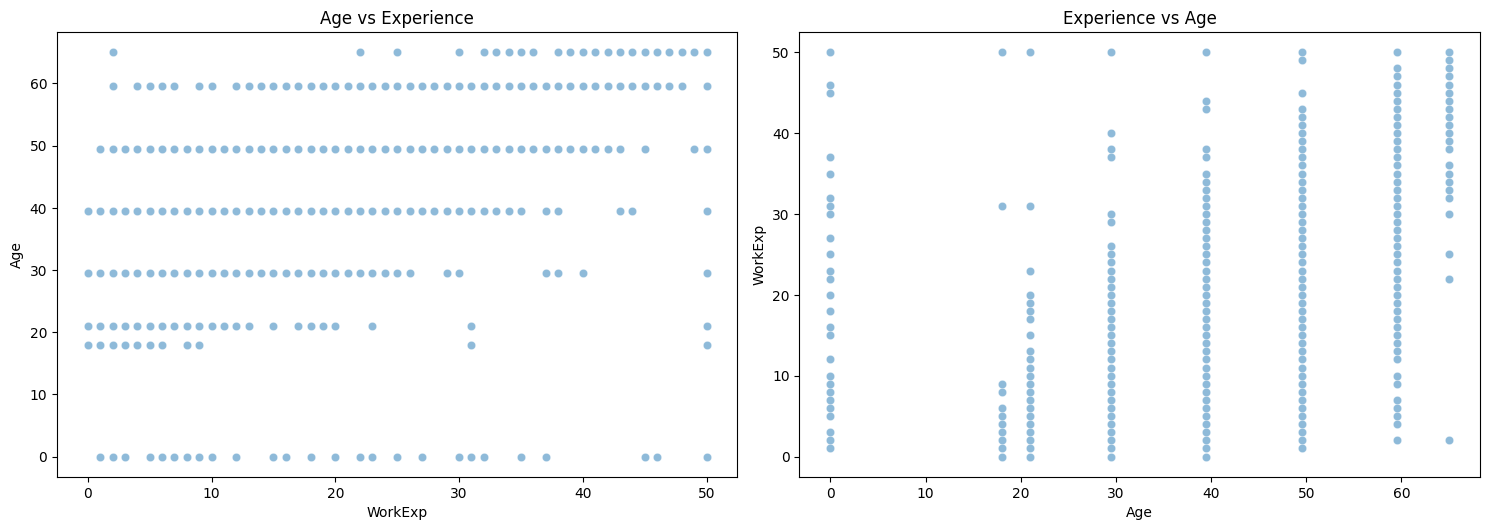

In [27]:
## Write your code here
def analyze_work_correlations(age_df):
    """
    Analyzes correlations with both heatmap and scatter plots
    """
    df = pd.DataFrame(age_df, columns=['age_range', 'min_age', 'max_age', 'Age', 'count','WorkExp'])
    # Select relevant columns
    cols_of_interest = ['Age', 'WorkExp']
    correlation_data = df[cols_of_interest]
    print(correlation_data)
    
    # Create figure with subplots for heatmap and scatter plots
    fig = plt.figure(figsize=(15, 10))
    gs = fig.add_gridspec(2, 2)
    
    # Heatmap
    ax1 = fig.add_subplot(gs[0, 0])
    correlation_matrix = correlation_data.corr()
   
    sns.scatterplot(
        data=correlation_data,
        x='WorkExp',
        y='Age',
        alpha=0.5,
        ax=ax1
    )
    ax1.set_title('Age vs Experience')
    
    # Scatter plot: Compensation vs Satisfaction
    ax2 = fig.add_subplot(gs[0, 1])
    sns.scatterplot(
        data=correlation_data,
        x='Age',
        y='WorkExp',
        alpha=0.5,
        ax=ax2
    )
    ax2.set_title('Experience vs Age')
    
   
    plt.tight_layout()
    
    # Display insights
    html_content = f"""
    <style>
        .correlation-insights {{
            margin: 20px;
            padding: 15px;
            background-color: black;
            border-radius: 8px;
            font-family: Arial, sans-serif;
        }}
        .highlight {{
            color: #1976D2;
            font-weight: bold;
        }}
    </style>
    
    <div class='correlation-insights'>
        <h3>Key Correlation Insights</h3>
        <p>Age-Experience Correlation: <span class='highlight'>{correlation_matrix.iloc[0,0]:.3f}</span></p>
        <p>Experience-Age Correlation: <span class='highlight'>{correlation_matrix.iloc[0,1]:.3f}</span></p>
        
    </div>
    """
    
    display(HTML(html_content))
    return correlation_matrix, fig

# Execute analysis
correlation_results, visualization = analyze_work_correlations(aw)
#correlation_results, visualization = analyze_work_correlations(clean_dataset)

In [28]:
sql="Select distinct TimeSearching  from main "
print(pd.read_sql_query(sql, conn))
sql="Select distinct TimeAnswering  from main "
print(pd.read_sql_query(sql, conn))
sql="Select distinct Frustration  from main "
print(pd.read_sql_query(sql, conn))

                TimeSearching
0                        None
1         30-60 minutes a day
2        60-120 minutes a day
3         15-30 minutes a day
4  Less than 15 minutes a day
5      Over 120 minutes a day
                TimeAnswering
0                        None
1        60-120 minutes a day
2         15-30 minutes a day
3         30-60 minutes a day
4  Less than 15 minutes a day
5      Over 120 minutes a day
                                           Frustration
0                                                 None
1    Amount of technical debt;Number of software to...
2    Amount of technical debt;Complexity of tech st...
3    Amount of technical debt;Complexity of tech st...
4    Amount of technical debt;Tracking my work;Comp...
..                                                 ...
950  Tracking my work;Reliability of tools/systems ...
951  Amount of technical debt;Number of software to...
952  Number of software tools in use;Tracking my wo...
953  Amount of technical debt;

In [29]:
def create_comprehensive_visualizations(df):
    """
    Creates multiple visualizations for data analysis
    """
    # 1. Bubble Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['TimeSearching'], df['Frustration'], 
               s=df['Age_Numeric']*20, alpha=0.5)
    plt.title('Search Time vs Frustration by Age')
    plt.xlabel('Time Searching')
    plt.ylabel('Frustration Level')
    
    # 2. Database Preferences Pie Chart
    plt.figure(figsize=(10, 8))
    top_5_db = df['DatabaseWantToWorkWith'].value_counts().head(5)
    plt.pie(top_5_db, labels=top_5_db.index, autopct='%1.1f%%')
    plt.title('Top 5 Desired Databases')
    
    # 3. Time Analysis Stacked Bar
    age_filter = (df['Age_Numeric'] >= 30) & (df['Age_Numeric'] <= 35)
    time_data = df[age_filter].groupby('Age_Numeric')[['TimeSearching', 'TimeAnswering']].median()
    
    plt.figure(figsize=(12, 6))
    time_data.plot(kind='bar', stacked=True)
    plt.title('Median Search and Answer Time (Age 30-35)')
    plt.xlabel('Age')
    plt.ylabel('Time (minutes)')
    
    # 4. Compensation by Age Plot
    age_filter = (df['Age_Numeric'] >= 45) & (df['Age_Numeric'] <= 60)
    comp_data = df[age_filter].groupby('Age_Numeric')['CompTotal'].median()
    
    plt.figure(figsize=(12, 6))
    comp_data.plot(kind='line', marker='o')
    plt.title('Median Compensation by Age (45-60)')
    plt.xlabel('Age')
    plt.ylabel('Compensation')
    
    # 5. MainBranch Distribution
    plt.figure(figsize=(12, 6))
    branch_counts = df['MainBranch'].value_counts()
    branch_counts.plot(kind='barh')
    plt.title('Distribution of Main Branch')
    plt.xlabel('Count')
    
    plt.tight_layout()
    return {
        'db_preferences': top_5_db,
        'time_analysis': time_data,
        'comp_data': comp_data,
        'branch_dist': branch_counts
    }

# Execute visualizations
sql="Select *,REGEXP_SUBSTR(CAST(Age AS TEXT), '[0-9]+') as min_age,REGEXP_SUBSTR(CAST(Age AS TEXT), '[0-9]+(?= years)') as max_age, (REGEXP_SUBSTR(CAST(Age AS TEXT), '[0-9]+')+REGEXP_SUBSTR(CAST(Age AS TEXT), '[0-9]+(?= years)'))/2.0 as Age_Numeric from main "
df=pd.read_sql_query(sql, conn)
#visualization_results = create_comprehensive_visualizations(df)


In [30]:
def create_data_visualizations(df):
    """
    Creates comprehensive visualization suite with categorical-to-numeric conversions
    """
    # Time mapping
    time_categories = {
        'Less than 15 minutes a day': 1,
        '15-30 minutes a day': 2,
        '30-60 minutes a day': 3,
        '60-120 minutes a day': 4,
        'Over 120 minutes a day': 5
    }
    
    # Convert time data
    df['TimeSearching_Num'] = df['TimeSearching'].map(time_categories)
    df['TimeAnswering_Num'] = df['TimeAnswering'].map(time_categories)
    df['Frustration_Count'] = df['Frustration'].str.count(';') + 1
    
    # 1. Bubble Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['TimeSearching_Num'], df['Frustration_Count'], 
               s=df['Age_Numeric']*20, alpha=0.5)
    plt.title('Search Time vs Frustration by Age')
    plt.xlabel('Time Searching (Categorical Scale)')
    plt.ylabel('Number of Frustration Points')
    
    # 2. Database Preferences
    plt.figure(figsize=(10, 8))
    top_5_db = df['DatabaseWantToWorkWith'].str.split(';').explode().value_counts().head(5)
    plt.pie(top_5_db, labels=top_5_db.index, autopct='%1.1f%%')
    plt.title('Top 5 Desired Databases')
    
    # 3. Time Analysis by Age
    age_mask = (df['Age_Numeric'] >= 30) & (df['Age_Numeric'] <= 35)
    time_data = df[age_mask].groupby('Age_Numeric')[['TimeSearching_Num', 'TimeAnswering_Num']].median()
    
    plt.figure(figsize=(12, 6))
    time_data.plot(kind='bar', stacked=True)
    plt.title('Median Search and Answer Time (Age 30-35)')
    plt.xlabel('Age')
    plt.ylabel('Time Category')
    
    # 4. Compensation Analysis
    age_mask = (df['Age_Numeric'] >= 45) & (df['Age_Numeric'] <= 60)
    comp_data = df[age_mask].groupby('Age_Numeric')['CompTotal'].median()
    
    plt.figure(figsize=(12, 6))
    comp_data.plot(kind='line', marker='o')
    plt.title('Median Compensation by Age (45-60)')
    plt.xlabel('Age')
    plt.ylabel('Compensation')
    
    # 5. MainBranch Distribution
    plt.figure(figsize=(12, 6))
    branch_counts = df['MainBranch'].value_counts()
    branch_counts.plot(kind='barh')
    plt.title('Distribution of Main Branch')
    plt.xlabel('Count')
    
    plt.tight_layout()
    return {
        'time_categories': time_categories,
        'db_preferences': top_5_db,
        'time_analysis': time_data,
        'comp_data': comp_data,
        'branch_dist': branch_counts
    }

# Execute visualizations
sql="Select *, (REGEXP_SUBSTR(CAST(Age AS TEXT), '[0-9]+')+REGEXP_SUBSTR(CAST(Age AS TEXT), '[0-9]+(?= years)'))/2.0 as Age_Numeric   from main "
df=pd.read_sql_query(sql, conn)
#visualization_results = create_data_visualizations(df)

In [31]:
def create_data_visualizations(df):
    """
    Creates comprehensive visualization suite with categorical-to-numeric conversions
    """
    # Time mapping
    time_categories = {
        'Less than 15 minutes a day': 1,
        '15-30 minutes a day': 2,
        '30-60 minutes a day': 3,
        '60-120 minutes a day': 4,
        'Over 120 minutes a day': 5
    }
    
    # Convert time data
    df['TimeSearching_Num'] = df['TimeSearching'].map(time_categories)
    df['TimeAnswering_Num'] = df['TimeAnswering'].map(time_categories)
    df['Frustration_Count'] = df['Frustration'].str.count(';') + 1
    
    # 1. Bubble Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['TimeSearching_Num'], df['Frustration_Count'], 
               s=df['Age_Numeric']*20, alpha=0.5)
    plt.title('Search Time vs Frustration by Age')
    plt.xlabel('Time Searching (Categorical Scale)')
    plt.ylabel('Number of Frustration Points')
    
    # 2. Database Preferences
    plt.figure(figsize=(10, 8))
    top_5_db = df['DatabaseWantToWorkWith'].str.split(';').explode().value_counts().head(5)
    plt.pie(top_5_db, labels=top_5_db.index, autopct='%1.1f%%')
    plt.title('Top 5 Desired Databases')
    
    # 3. Time Analysis by Age
    age_mask = (df['max_age']>=30) & (df['max_age']<=35)
    
    time_data = df[age_mask].groupby('Age')[['TimeSearching_Num', 'TimeAnswering_Num']].median()
    print(time_data)
    
    plt.figure(figsize=(12, 6))
    time_data.plot(kind='bar', stacked=True)
    plt.title('Median Search and Answer Time (Age 30-35)')
    plt.xlabel('Age')
    plt.ylabel('Time Category')
    
    # 4. Compensation Analysis
    age_mask = (df['Age_Numeric'] >= 45) & (df['Age_Numeric'] <= 60)
    comp_data = df[age_mask].groupby('Age_Numeric')['CompTotal'].median()
    
    plt.figure(figsize=(12, 6))
    comp_data.plot(kind='line', marker='o')
    plt.title('Median Compensation by Age (45-60)')
    plt.xlabel('Age')
    plt.ylabel('Compensation')
    
    # 5. MainBranch Distribution
    plt.figure(figsize=(12, 6))
    branch_counts = df['MainBranch'].value_counts()
    branch_counts.plot(kind='barh')
    plt.title('Distribution of Main Branch')
    plt.xlabel('Count')
    
    plt.tight_layout()
    return {
        'time_categories': time_categories,
        'db_preferences': top_5_db,
        'time_analysis': time_data,
        'comp_data': comp_data,
        'branch_dist': branch_counts
    }
#age_mask = df[(df['Age_Numeric'] >= 30.0) & (df['Age_Numeric'] <= 35.0)]#[['TimeSearching_Num', 'TimeAnswering_Num']]
#print(age_mask)
#time_data = df[age_mask].groupby('Age_Numeric')[['TimeSearching_Num', 'TimeAnswering_Num']].median()
#print(time_data)
#visualization_results = create_data_visualizations(df)

In [32]:
# Execute visualizations
sql="Select *,REGEXP_SUBSTR(CAST(Age AS TEXT), '[0-9]+')/1.0 as min_age,REGEXP_SUBSTR(CAST(Age AS TEXT), '[0-9]+(?= years)')/1.0 as max_age, (REGEXP_SUBSTR(CAST(Age AS TEXT), '[0-9]+')+REGEXP_SUBSTR(CAST(Age AS TEXT), '[0-9]+(?= years)'))/2.0 as Age_Numeric from main "
df=pd.read_sql_query(sql, conn)

#print(df)
#print(df['Age'][(df['max_age']>=30) & (df['max_age']<=35)].unique())

  # Time mapping
time_categories = {
        'Less than 15 minutes a day': 1,
        '15-30 minutes a day': 2,
        '30-60 minutes a day': 3,
        '60-120 minutes a day': 4,
        'Over 120 minutes a day': 5
    }
    
    # Convert time data
df['TimeSearching_Num'] = df['TimeSearching'].map(time_categories)
df['TimeAnswering_Num'] = df['TimeAnswering'].map(time_categories)
df['Frustration_Count'] = df['Frustration'].str.count(';') + 1


**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


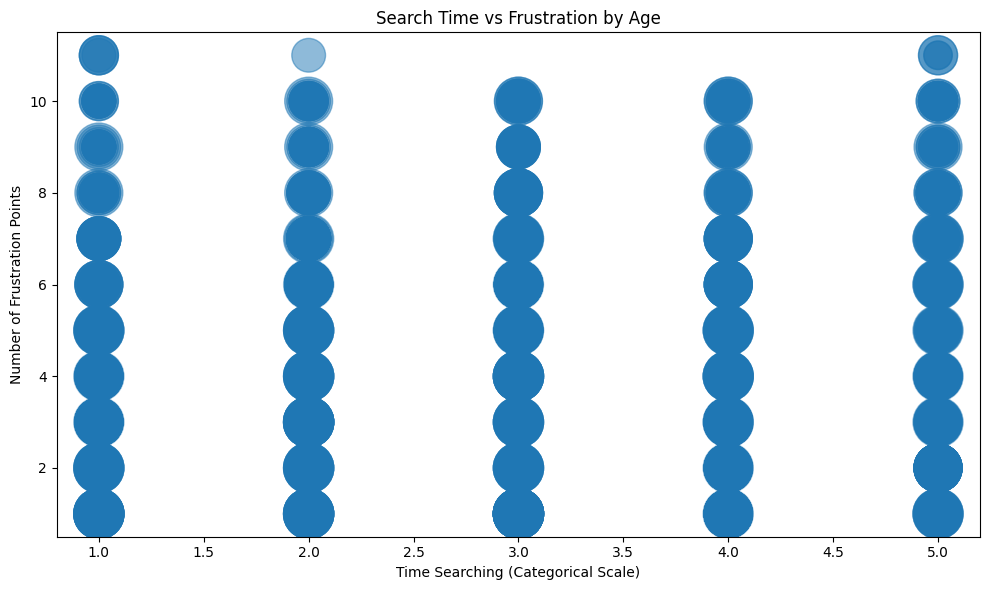

In [33]:
## Write your code here Bubble Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['TimeSearching_Num'], df['Frustration_Count'], s=df['Age_Numeric']*20, alpha=0.5)
plt.title('Search Time vs Frustration by Age')
plt.xlabel('Time Searching (Categorical Scale)')
plt.ylabel('Number of Frustration Points')
plt.tight_layout()
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


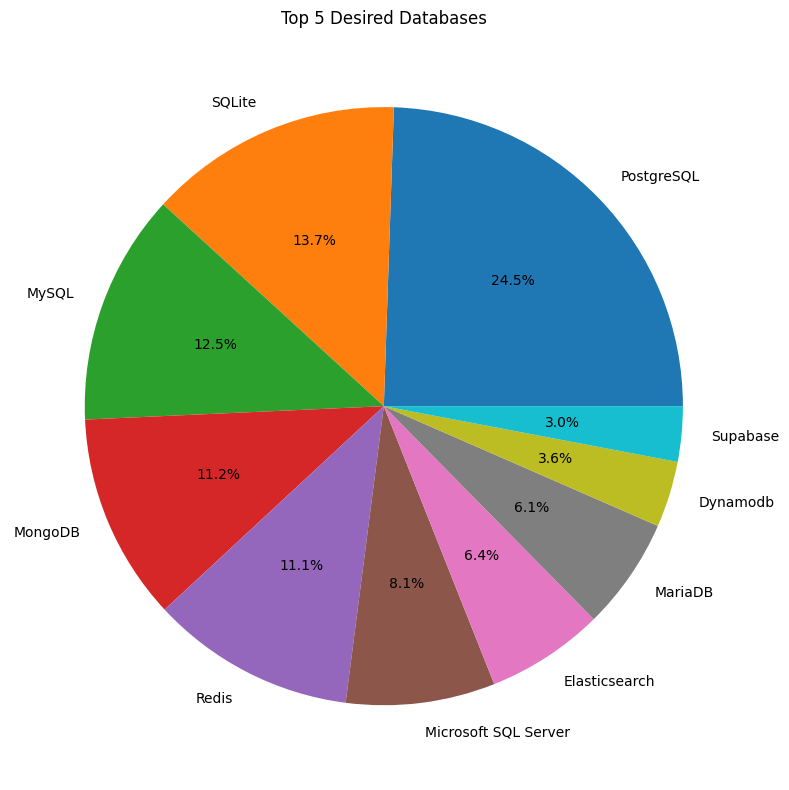

In [34]:
## Write your code here  Database Preferences
plt.figure(figsize=(10, 8))
top_5_db = df['DatabaseWantToWorkWith'].str.split(';').explode().value_counts().head(10)
plt.pie(top_5_db, labels=top_5_db.index, autopct='%1.1f%%')
plt.title('Top 5 Desired Databases')
plt.tight_layout()
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


                 TimeSearching_Num  TimeAnswering_Num
Age                                                  
25-34 years old                3.0                2.0


<Figure size 1200x600 with 0 Axes>

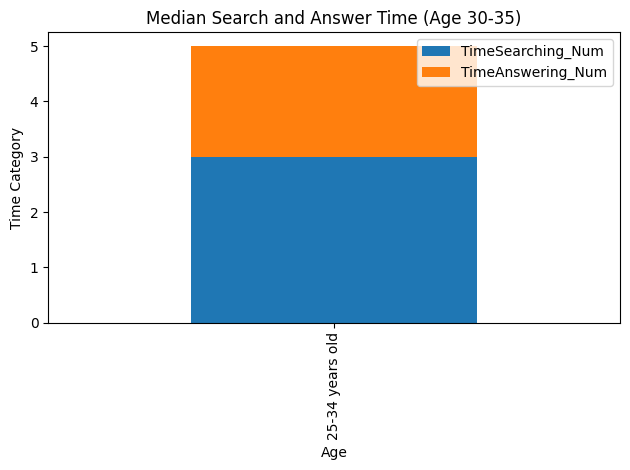

In [35]:
## Write your code here  Time Analysis by Age
age_mask = (df['max_age']>=30) & (df['max_age']<=35)
    
time_data = df[age_mask].groupby('Age')[['TimeSearching_Num', 'TimeAnswering_Num']].median()
print(time_data)
    
plt.figure(figsize=(12, 6))
time_data.plot(kind='bar', stacked=True)
plt.title('Median Search and Answer Time (Age 30-35)')
plt.xlabel('Age')
plt.ylabel('Time Category')
plt.tight_layout()
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


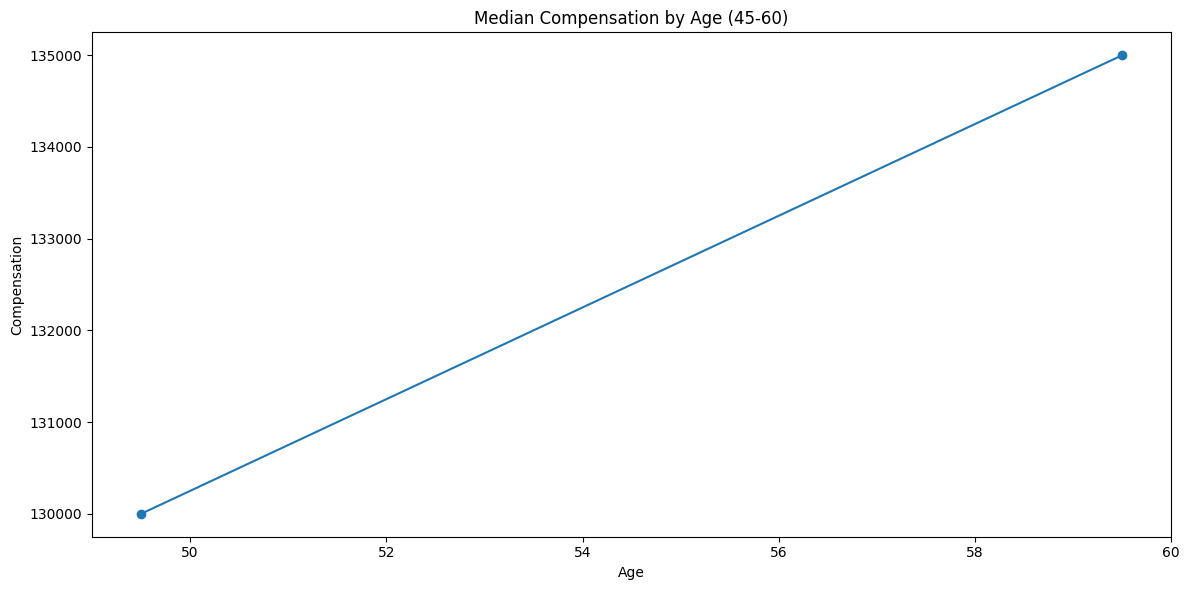

In [36]:
## Write your code here Compensation Analysis
age_mask = (df['Age_Numeric'] >= 45) & (df['Age_Numeric'] <= 60)
comp_data = df[age_mask].groupby('Age_Numeric')['CompTotal'].median()
    
plt.figure(figsize=(12, 6))
comp_data.plot(kind='line', marker='o')
plt.title('Median Compensation by Age (45-60)')
plt.xlabel('Age')
plt.ylabel('Compensation')
plt.tight_layout()
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


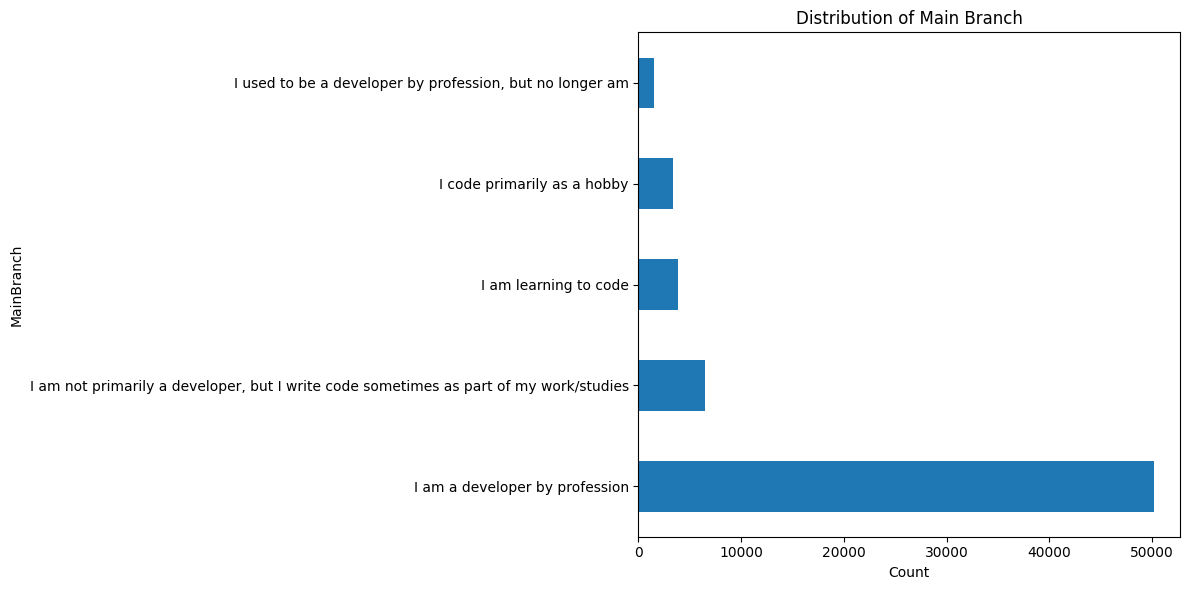

In [37]:
## Write your code here  MainBranch Distribution
plt.figure(figsize=(12, 6))
branch_counts = df['MainBranch'].value_counts()
branch_counts.plot(kind='barh')
plt.title('Distribution of Main Branch')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [38]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.


In [39]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2024-12-27 18:10:09--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  59.4MB/s    in 3.5s    

2024-12-27 18:10:13 (57.5 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



In [5]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display

Connect to the SQLite database¶

In [16]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**

In [17]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)

   COUNT(*)
0     65437


**Demo 2: List all tables**

In [18]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


**Demo 3: Group data by age**

In [19]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


Hands-on Lab: Visualizing Data with Histograms
1. Visualizing the distribution of data (Histograms)
1.1 Histogram of CompTotal (Total Compensation)

Objective: Plot a histogram of CompTotal to visualize the distribution of respondents' total compensation.

In [20]:
import sqlite3
import re

# Custom REGEXP_SUBSTR function in Python
def regexp_substr(string, pattern, start=0):
    start = max(start, 0)  # Ensure 'start' is within bounds
    match = re.search(pattern, string[start:])
    if match:
        return match.group(0)
    return 0

# Connect to SQLite database
#conn = sqlite3.connect('your_database.db')

# Register the REGEXP_SUBSTR function with SQLite
conn.create_function('REGEXP_SUBSTR', 2, regexp_substr)
# Calculate IQR bounds

In [21]:
sql="Select *,REGEXP_SUBSTR(CAST(Age AS TEXT), '[0-9]+')/1.0 as min_age,REGEXP_SUBSTR(CAST(Age AS TEXT), '[0-9]+(?= years)')/1.0 as max_age, (REGEXP_SUBSTR(CAST(Age AS TEXT), '[0-9]+')+REGEXP_SUBSTR(CAST(Age AS TEXT), '[0-9]+(?= years)'))/2.0 as Age_Numeric from main "
df=pd.read_sql_query(sql, conn)

# Calculate IQR bounds
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
    
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
    
    # Create clean dataset
clean_df = df[
        (df['CompTotal'] >= lower_bound) & 
        (df['CompTotal'] <= upper_bound)
    ].copy()

#print(df)
#print(df['Age'][(df['max_age']>=30) & (df['max_age']<=35)].unique())

  # Time mapping
time_categories = {
        'Less than 15 minutes a day': 1,
        '15-30 minutes a day': 2,
        '30-60 minutes a day': 3,
        '60-120 minutes a day': 4,
        'Over 120 minutes a day': 5
    }
    
# Convert time data
clean_df['TimeSearching_Num'] = clean_df['TimeSearching'].map(time_categories)
clean_df['TimeAnswering_Num'] = clean_df['TimeAnswering'].map(time_categories)
clean_df['Frustration_Count'] = clean_df['Frustration'].str.count(';') + 1
clean_df['CompTotal'].fillna(clean_df['CompTotal'].median(), inplace=True)
clean_df['JobSatPoints_6'].fillna(clean_df['JobSatPoints_6'].median(), inplace=True)


/tmp/ipykernel_4618/529368837.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_df['CompTotal'].fillna(clean_df['CompTotal'].median(), inplace=True)
/tmp/ipykernel_4618/529368837.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

/tmp/ipykernel_4618/2943695871.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1))
/tmp/ipykernel_4618/2943695871.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1))
/tmp/ipykernel_4618/2943695871.py:93: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Years of Experience', bbox_to_anchor=(1.05, 1))


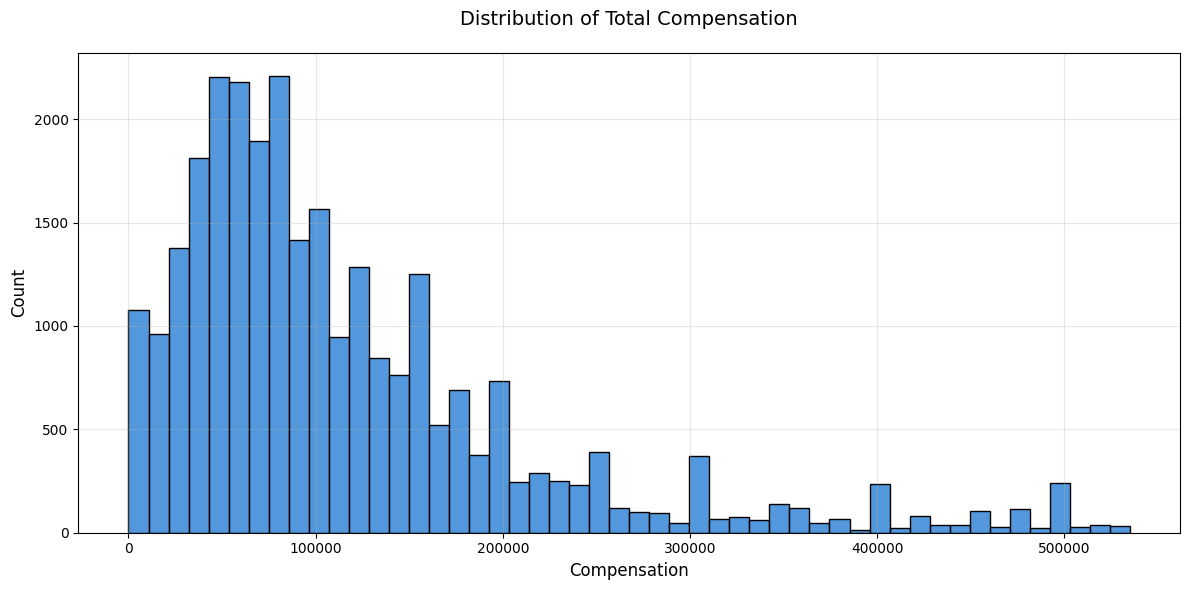

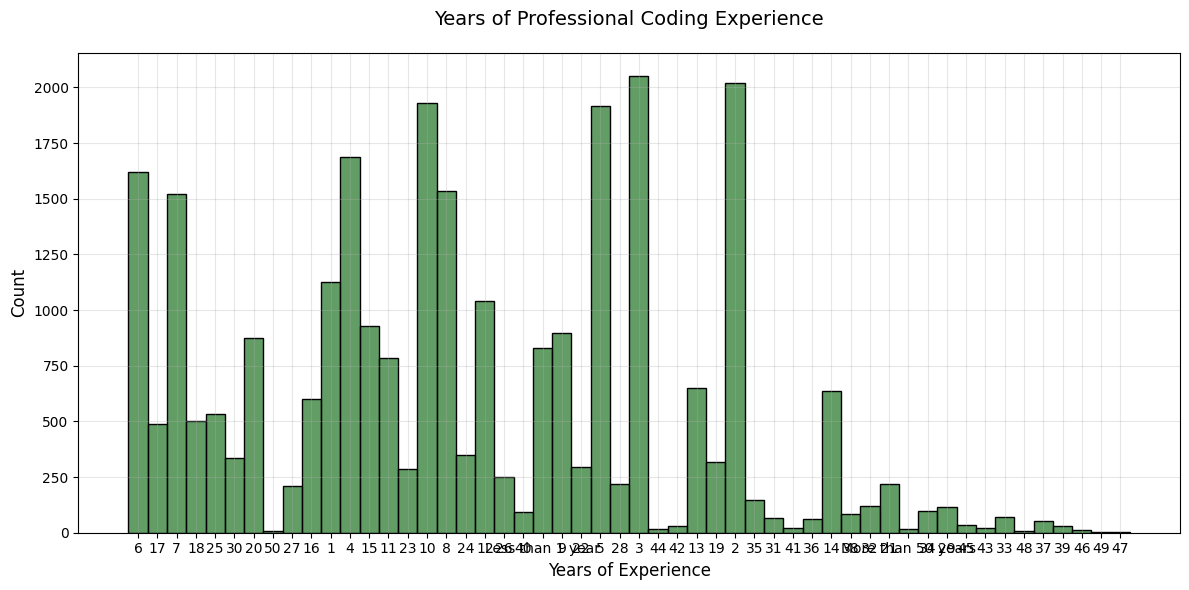

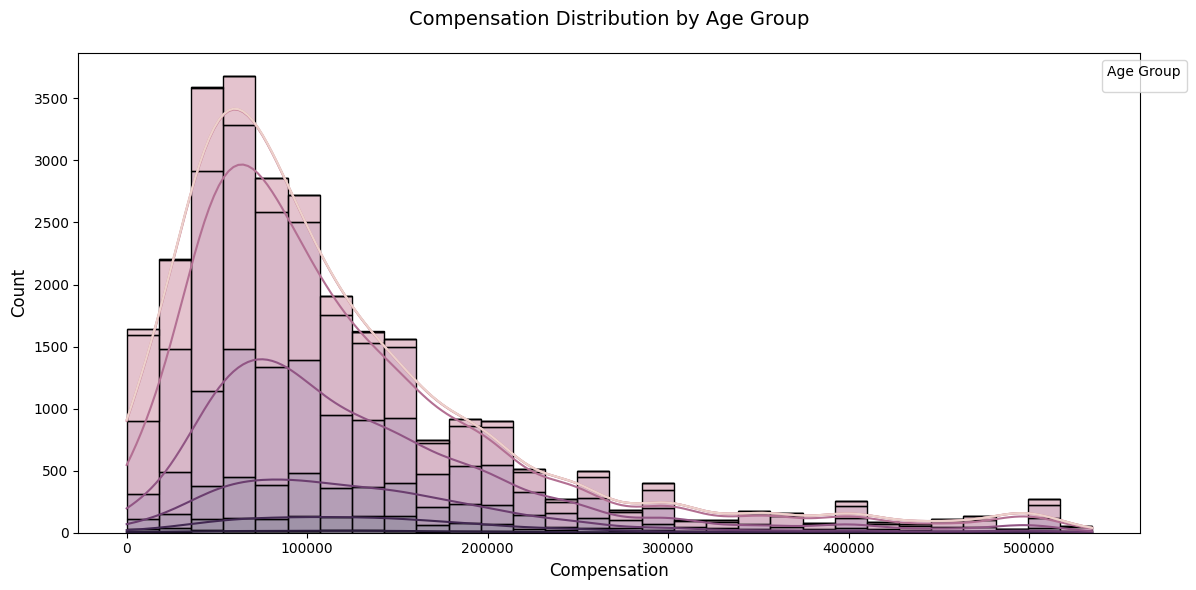

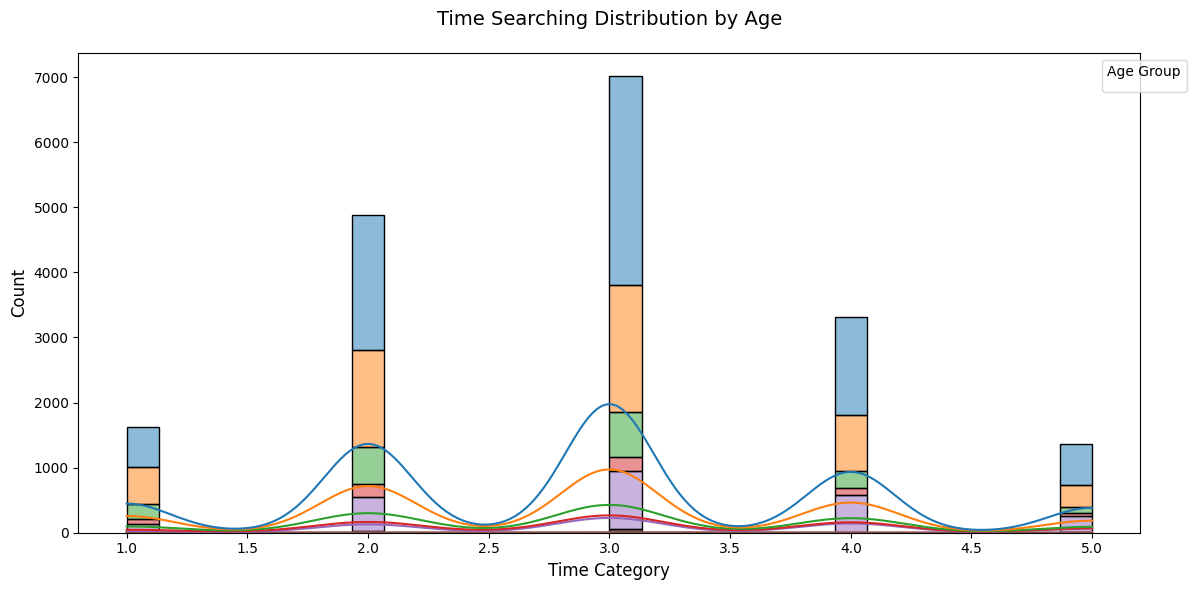

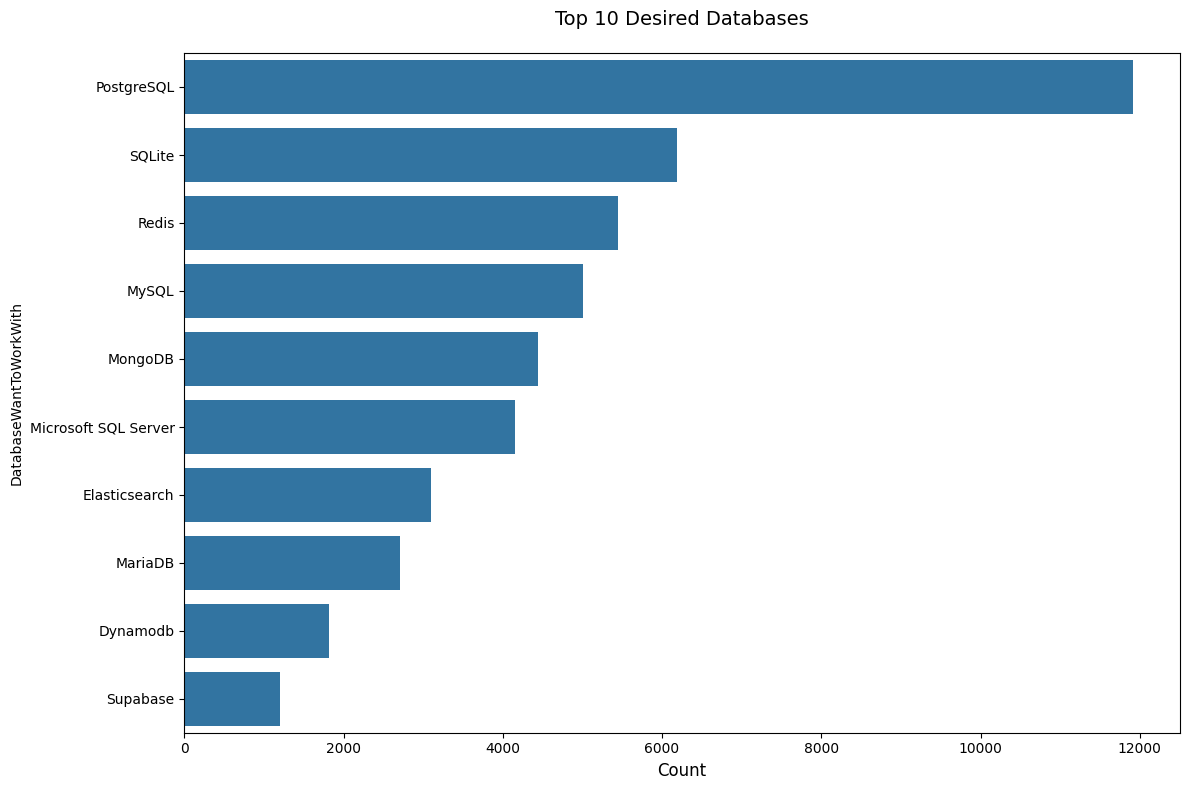

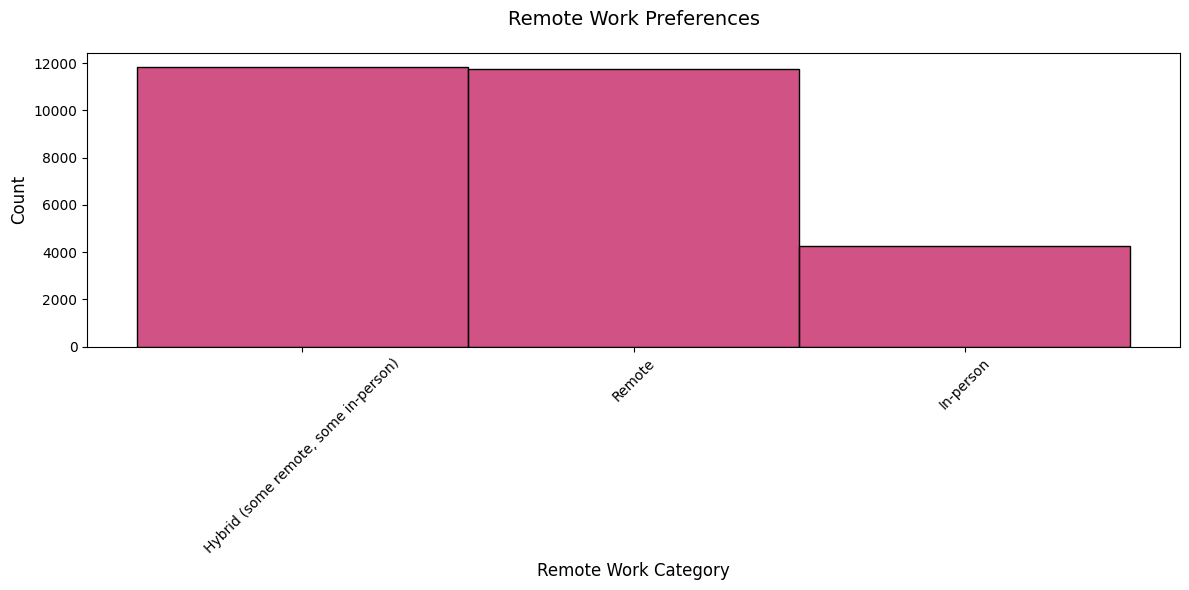

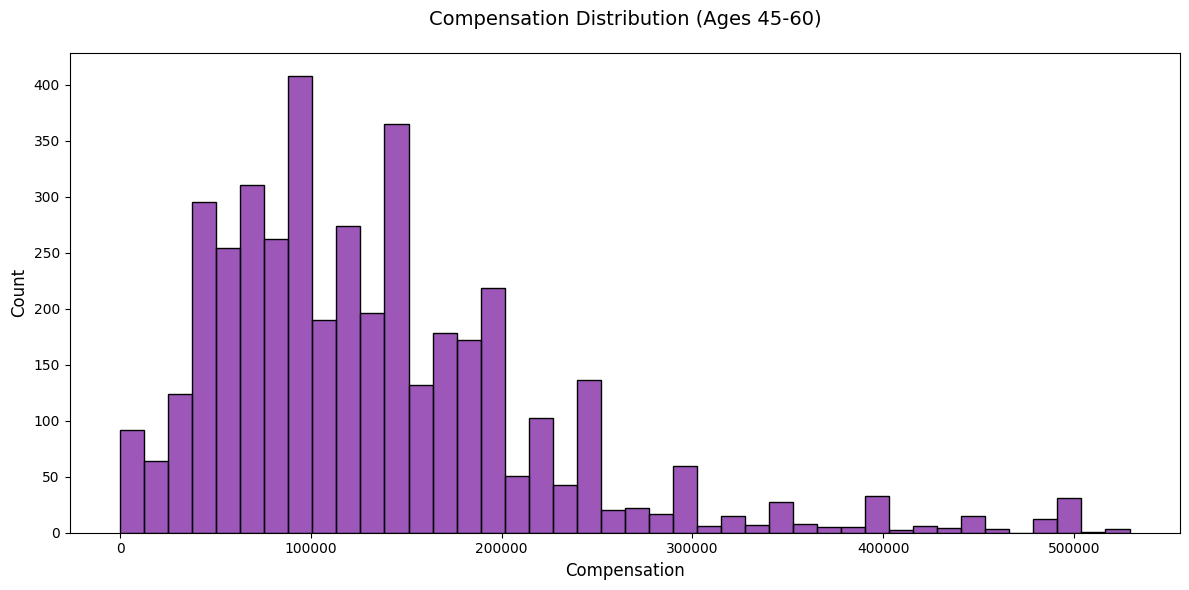

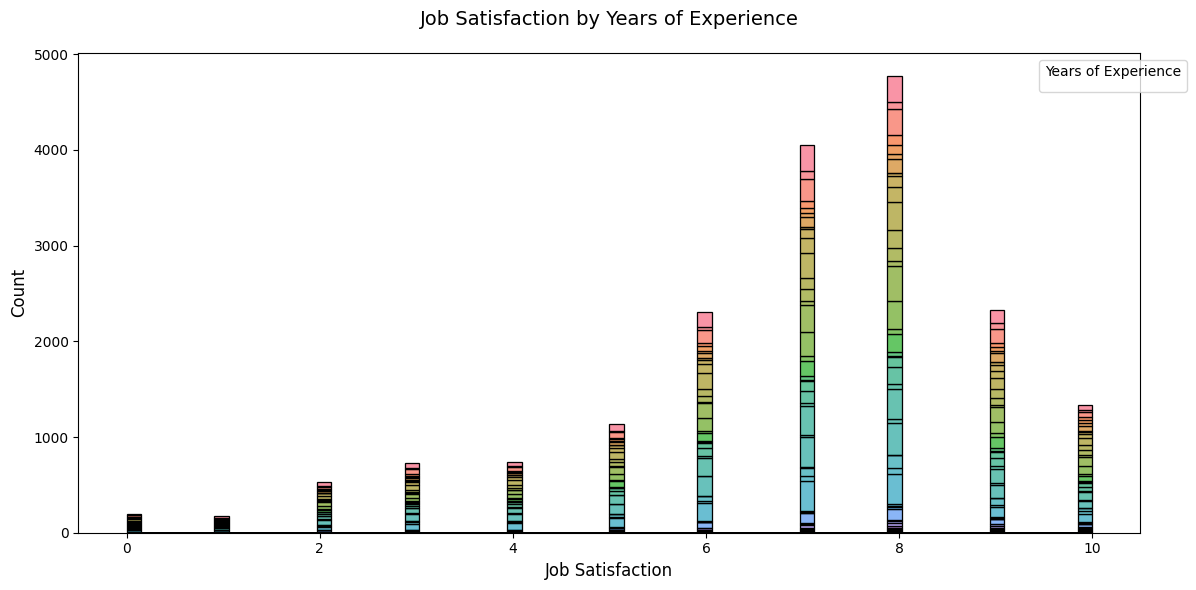

In [22]:
def plot_compensation_histogram(df):
    """
    1.1 CompTotal Distribution
    """
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='CompTotal', bins=50, color='#1976D2')
    plt.title('Distribution of Total Compensation', pad=20, fontsize=14)
    plt.xlabel('Compensation', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

def plot_experience_histogram(df):
    """
    1.2 YearsCodePro Distribution
    """
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='YearsCodePro', bins=30, color='#2E7D32')
    plt.title('Years of Professional Coding Experience', pad=20, fontsize=14)
    plt.xlabel('Years of Experience', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

def plot_comp_by_age(df):
    """
    2.1 CompTotal by Age Group
    """
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='CompTotal', hue='Age_Numeric', multiple="stack", bins=30, kde=True)
    plt.title('Compensation Distribution by Age Group', pad=20, fontsize=14)
    plt.xlabel('Compensation', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()

def plot_time_by_age(df):
    """
    2.2 TimeSearching by Age Group
    """
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='TimeSearching_Num', hue='Age', multiple="stack",  bins=30, kde=True)
    plt.title('Time Searching Distribution by Age', pad=20, fontsize=14)
    plt.xlabel('Time Category', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()

def plot_desired_databases(df):
    """
    3.1 Desired Databases
    """
    plt.figure(figsize=(12, 8))
    db_counts = df['DatabaseWantToWorkWith'].str.split(';').explode().value_counts()
    sns.barplot(x=db_counts.head(10).values, y=db_counts.head(10).index)
    plt.title('Top 10 Desired Databases', pad=20, fontsize=14)
    plt.xlabel('Count', fontsize=12)
    plt.tight_layout()

def plot_remote_work(df):
    """
    3.2 Remote Work Preferences
    """
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='RemoteWork', color='#C2185B')
    plt.title('Remote Work Preferences', pad=20, fontsize=14)
    plt.xlabel('Remote Work Category', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()

def plot_comp_45_60(df):
    """
    4.1 CompTotal for Ages 45-60
    """
    plt.figure(figsize=(12, 6))
    age_mask = (df['Age_Numeric'] >= 45) & (df['Age_Numeric'] <= 60)
    sns.histplot(data=df[age_mask], x='CompTotal', color='#7B1FA2')
    plt.title('Compensation Distribution (Ages 45-60)', pad=20, fontsize=14)
    plt.xlabel('Compensation', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.tight_layout()

def plot_satisfaction_by_experience(df):
    """
    4.2 Job Satisfaction by Experience
    """
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='JobSat', hue='YearsCodePro', multiple="stack")
    plt.title('Job Satisfaction by Years of Experience', pad=20, fontsize=14)
    plt.xlabel('Job Satisfaction', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Years of Experience', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()

# Execute each visualization
plot_compensation_histogram(clean_df)
plot_experience_histogram(clean_df)
plot_comp_by_age(clean_df)
plot_time_by_age(clean_df)
plot_desired_databases(clean_df)
plot_remote_work(clean_df)
plot_comp_45_60(clean_df)
plot_satisfaction_by_experience(clean_df)


In [23]:
def create_box_plots(df):
    """
    Box Plot Series
    """
    # 1. CompTotal Box Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(y=df['CompTotal'], color='#1976D2')
    plt.title('Distribution of Total Compensation')
    plt.tight_layout()
    
    # 2. Age Box Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(y=df['Age_Numeric'], color='#2E7D32')
    plt.title('Age Distribution')
    plt.tight_layout()
    
    # 3. CompTotal by Age Groups
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Age', y='CompTotal', data=df)
    plt.xticks(rotation=45)
    plt.title('Compensation Distribution by Age Groups')
    plt.tight_layout()
    
    # 4. CompTotal by Job Satisfaction
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=df)
    plt.title('Compensation Distribution by Job Satisfaction')
    plt.tight_layout()
    
    # 5. CompTotal by Developer Type
    plt.figure(figsize=(12, 6))
    top_5_dev = df['DevType'].value_counts().head().index
    sns.boxplot(x='DevType', y='CompTotal', data=df[df['DevType'].isin(top_5_dev)])
    plt.xticks(rotation=45)
    plt.title('Compensation Distribution by Top 5 Developer Types')
    plt.tight_layout()
    
    # 6. CompTotal by Country
    plt.figure(figsize=(12, 6))
    top_5_countries = df['Country'].value_counts().head().index
    sns.boxplot(x='Country', y='CompTotal', data=df[df['Country'].isin(top_5_countries)])
    plt.title('Compensation Distribution by Top 5 Countries')
    plt.tight_layout()
    
    # 7. CompTotal by Employment
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Employment', y='CompTotal', data=df)
    plt.xticks(rotation=45)
    plt.title('Compensation Distribution by Employment Type')
    plt.tight_layout()
    
    # 8. YearsCodePro by Job Satisfaction
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='JobSatPoints_6', y='YearsCodePro', data=df)
    plt.title('Years of Experience by Job Satisfaction')
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_4618/928416621.py:50: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


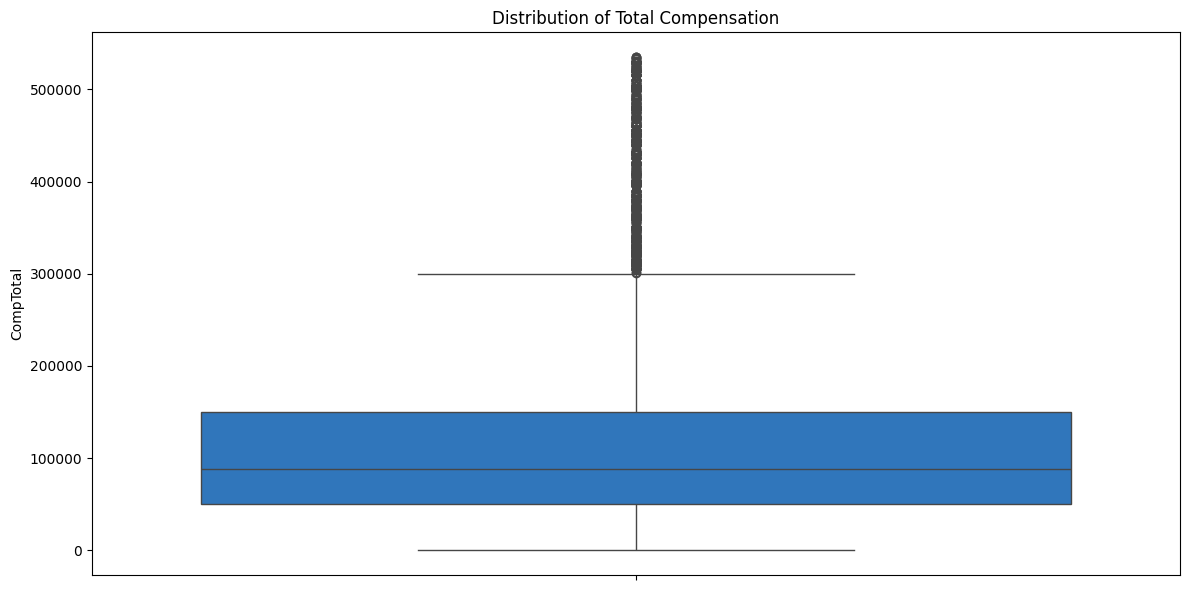

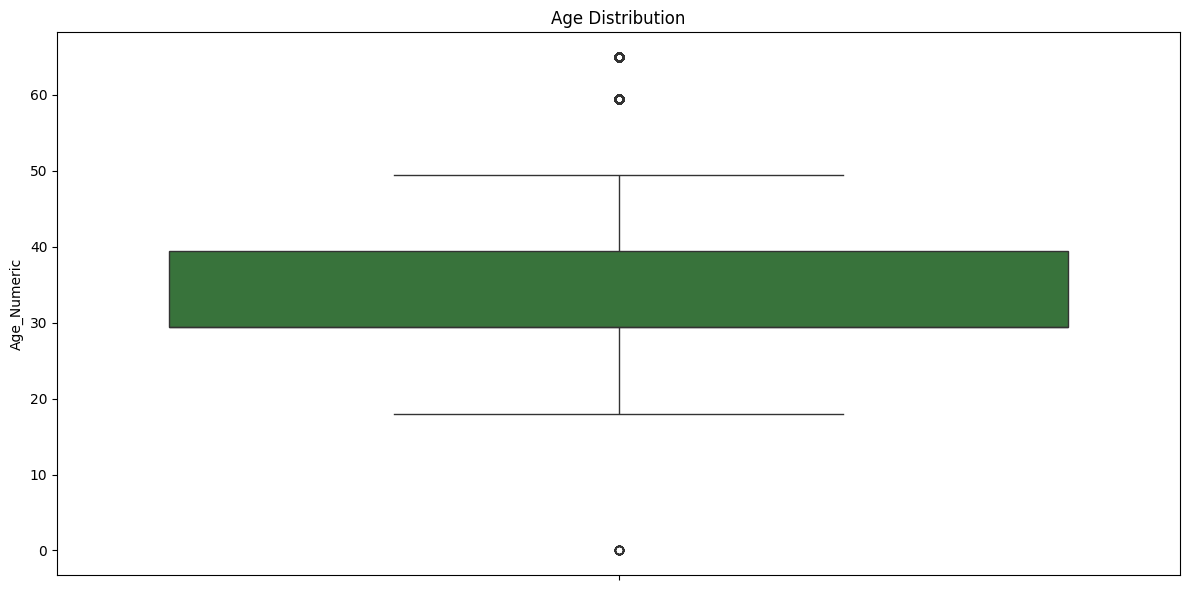

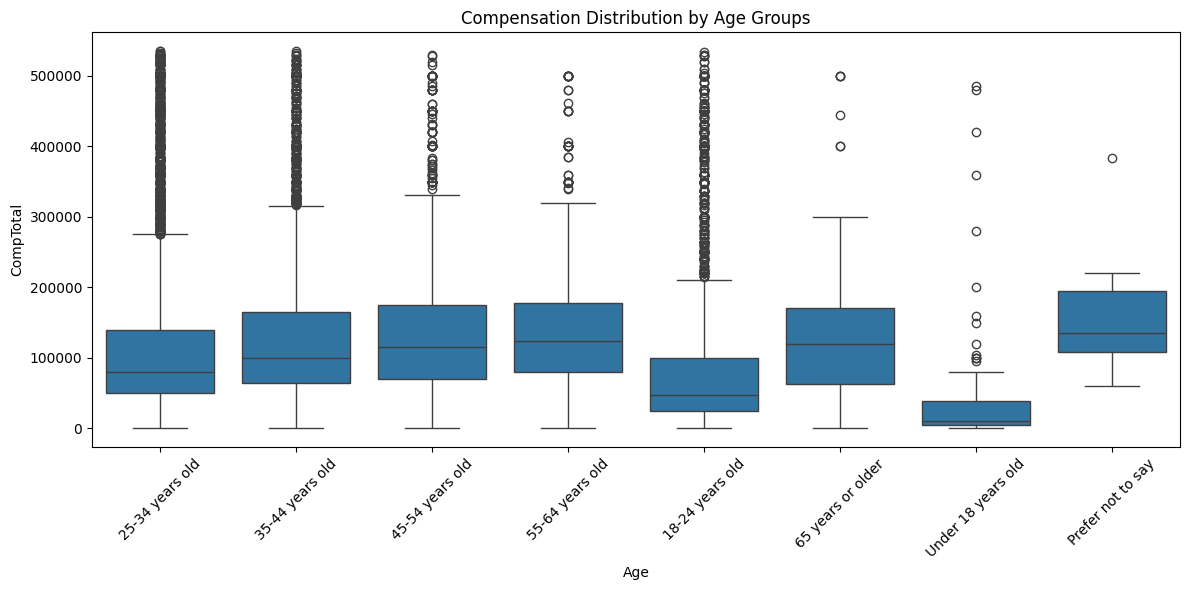

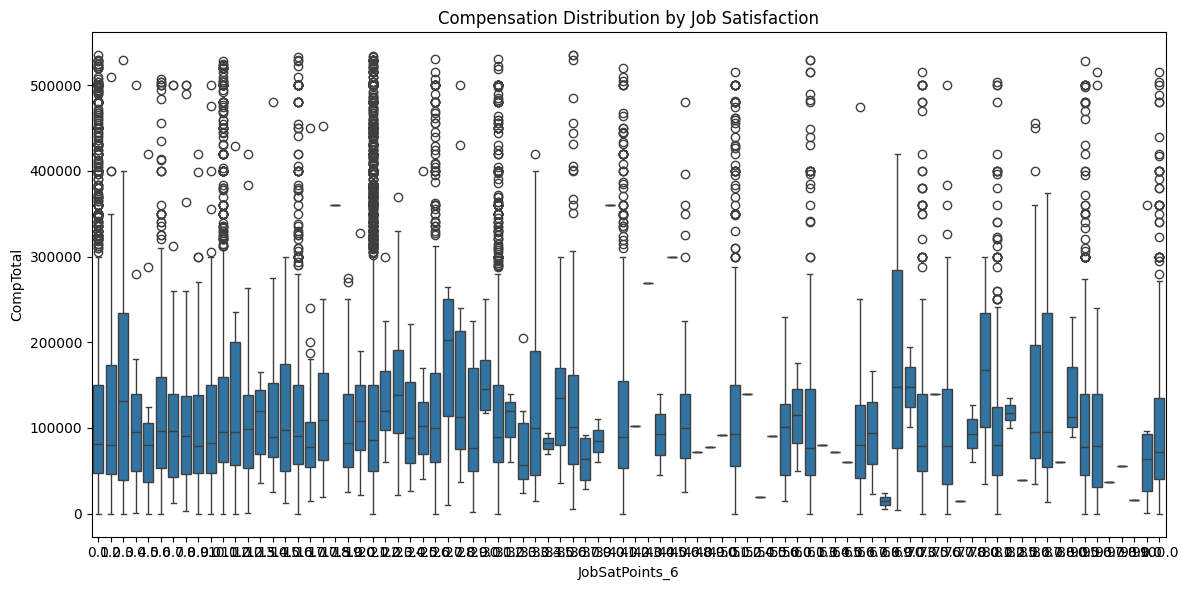

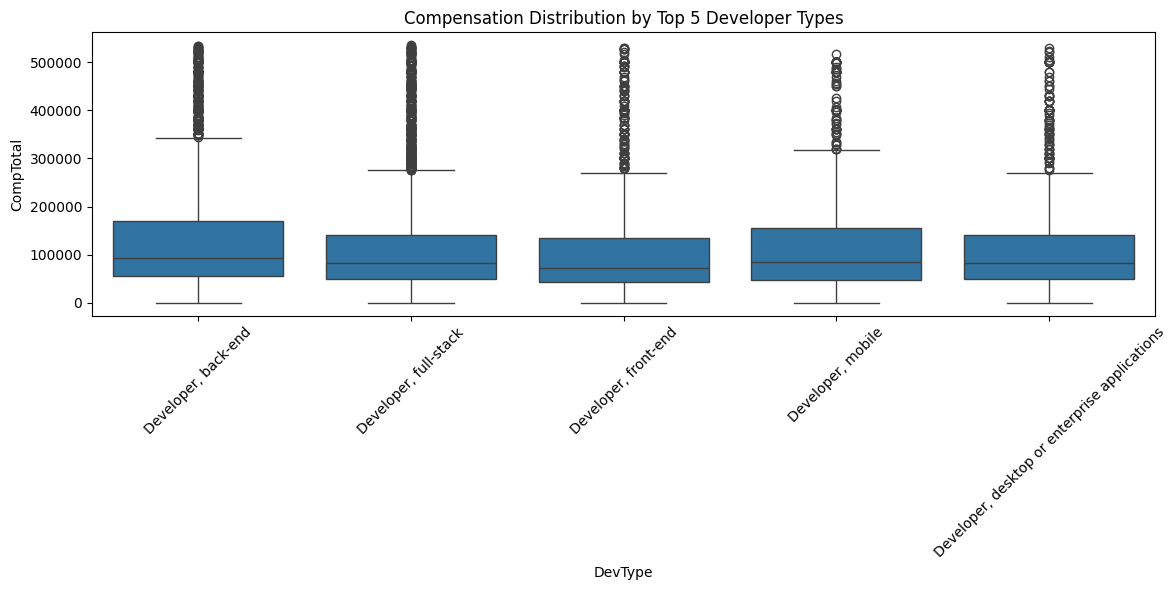

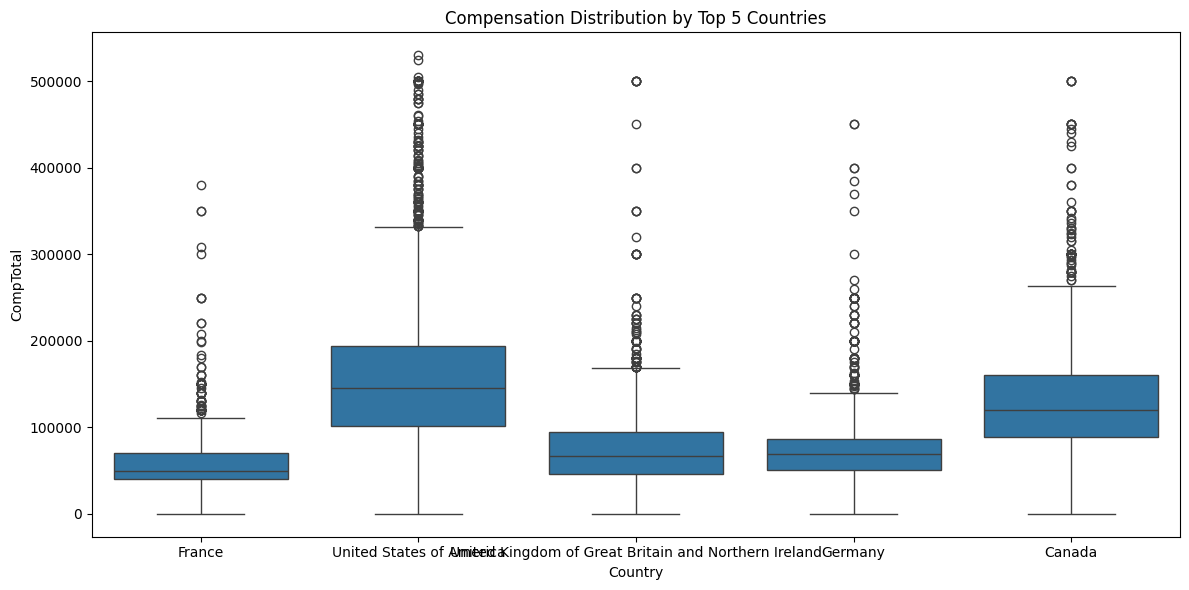

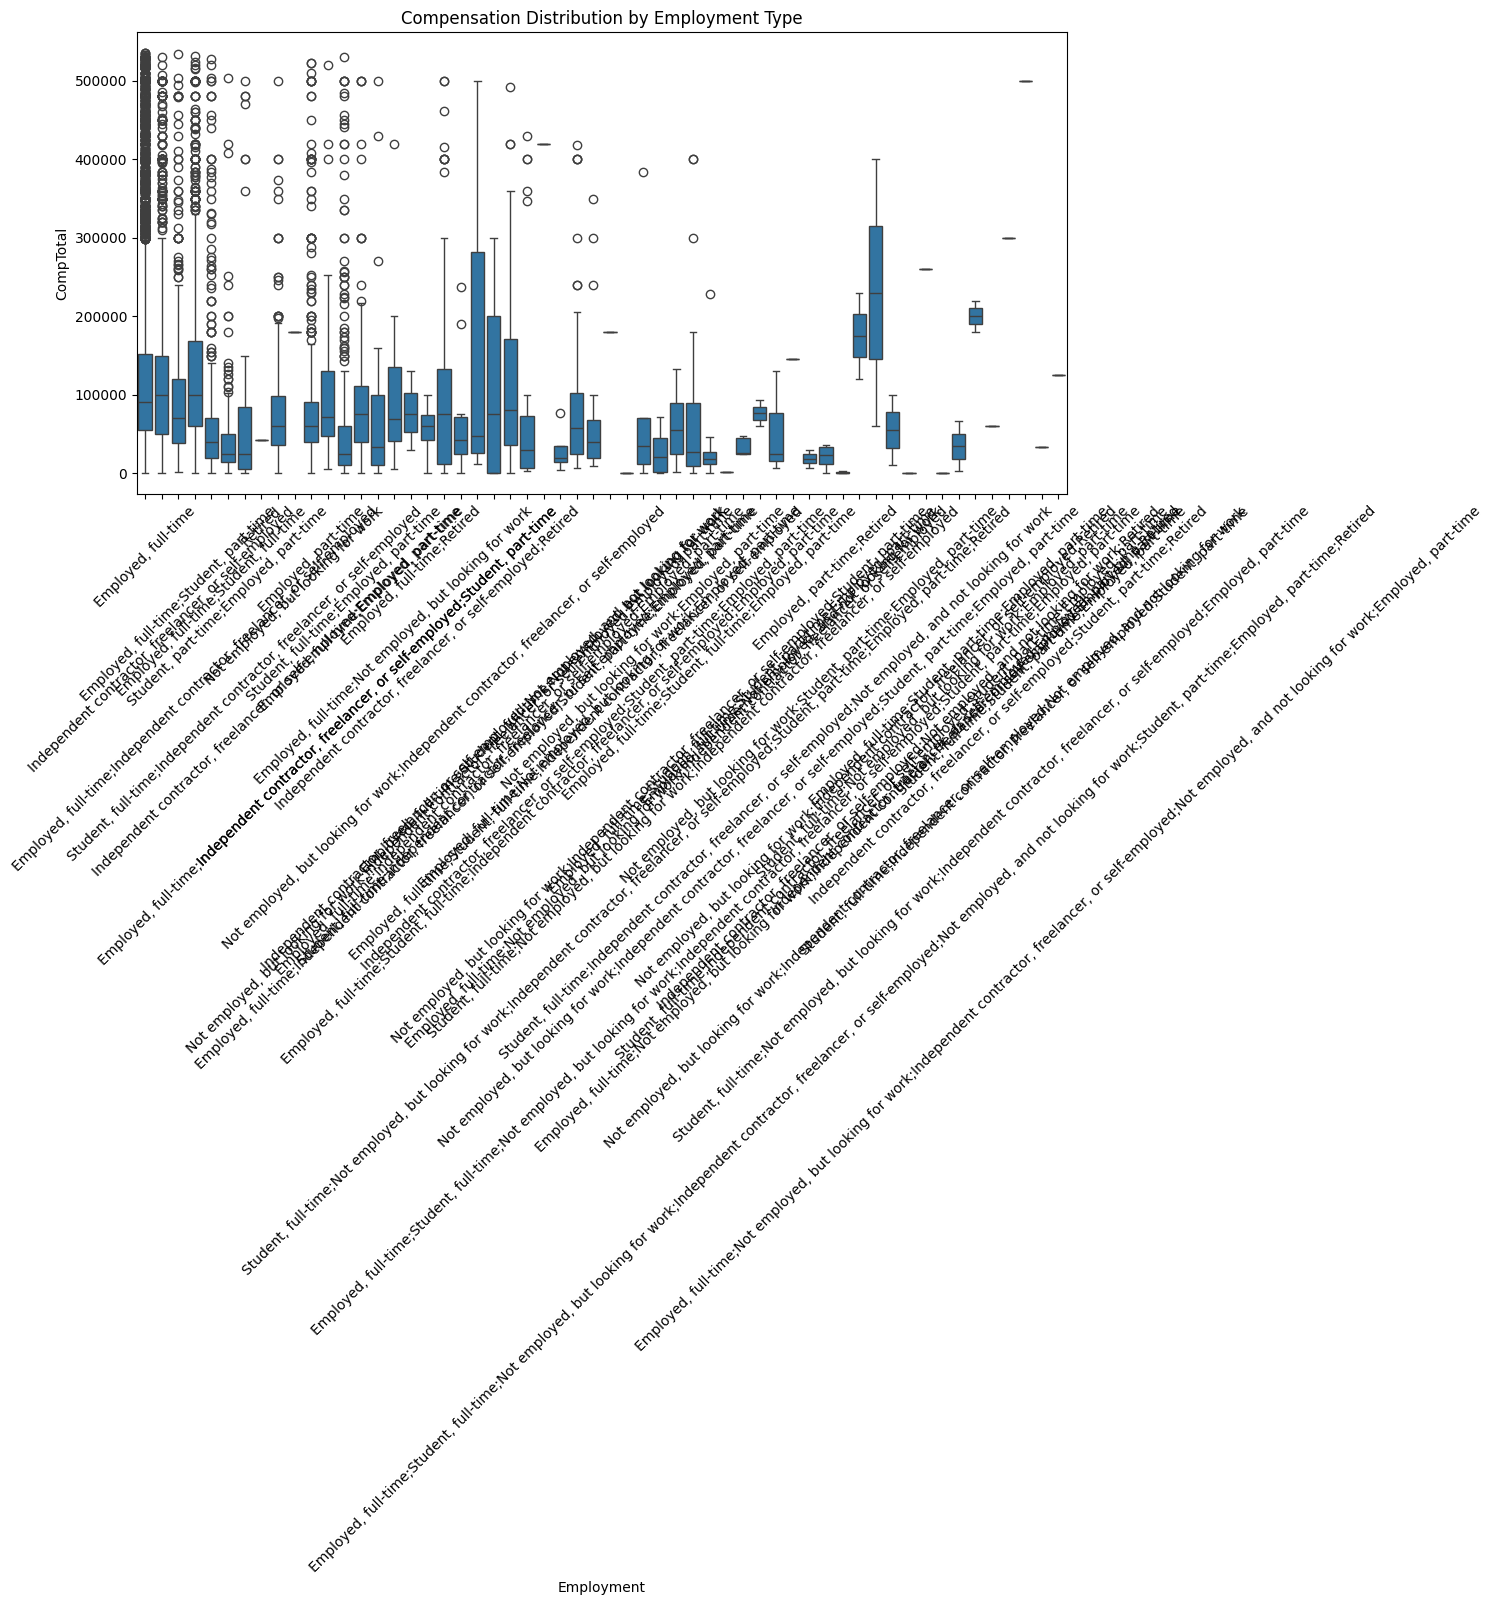

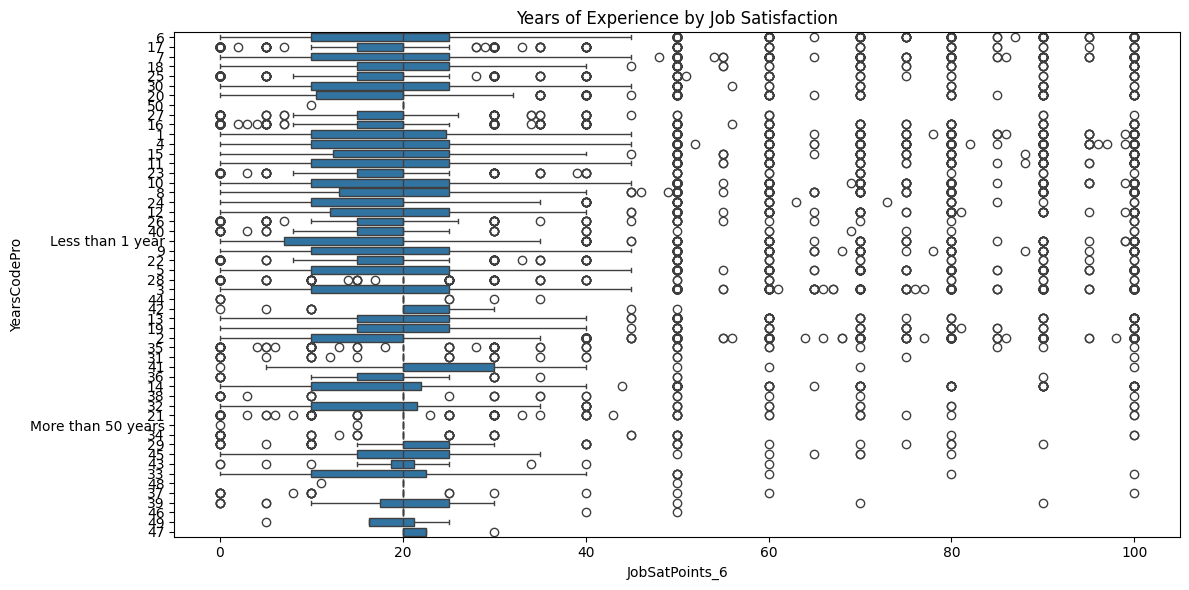

In [24]:
create_box_plots(clean_df)